In [26]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # seaborn package for visualising
import plotly.express as px # plotly visualisation
import time
import matplotlib.pyplot as plt
from fastai.tabular import * 
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coronavirus-2019ncov/covid-19-all.csv
/kaggle/input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Recovered.csv
/kaggle/input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Deaths.csv
/kaggle/input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Confirmed.csv


In [27]:
path = ('/kaggle/input/coronavirus-2019ncov/covid-19-all.csv')
path

'/kaggle/input/coronavirus-2019ncov/covid-19-all.csv'

In [28]:
whole_data_path='/kaggle/input/coronavirus-2019ncov/covid-19-all.csv'

#updated_corona_data = pd.read_csv("../input/covid19-coronavirus/2019_nCoV_data.csv")
#time_series_19_covid_Confirmed = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Confirmed.csv")
#time_series_19_covid_Deaths = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Deaths.csv")
#time_series_19_covid_Recovered = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Recovered.csv")

time_series_19_covid_Confirmed = pd.read_csv("../input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Confirmed.csv")
time_series_19_covid_Deaths = pd.read_csv("../input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Deaths.csv")
time_series_19_covid_Recovered = pd.read_csv("../input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Recovered.csv")

#recovered_data_path='/kaggle/input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Recovered.csv'
#deaths_data_path='/kaggle/input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Deaths.csv'
#confirmed_data_path='/kaggle/input/coronavirus-6th-mar-2020-johns-hopkins-university/time_series_19-covid-Confirmed.csv'

corona_data= pd.read_csv(whole_data_path)
#recovered_data=pd.read_csv(recovered_data_path)
#deaths_data=pd.read_csv(recovered_data_path)
#confirmed_data=pd.read_csv(recovered_data_path)

In [29]:
corona_data.shape
#recovered_data.shape
#deaths_data.shape
#confirmed_data.shape
#Total no. of rows|

(3992, 10)

In [33]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 9 columns):
Confirmed         3973 non-null float64
Country/Region    3992 non-null object
Deaths            3551 non-null float64
Latitude          3989 non-null float64
Longitude         3989 non-null float64
Province/State    2594 non-null object
Recovered         3604 non-null float64
date              3992 non-null object
date_str          3992 non-null object
dtypes: float64(5), object(4)
memory usage: 280.8+ KB


In [34]:
if 'Last Update' in corona_data.columns :
    corona_data=corona_data.drop('Last Update',axis=1)
elif  'Sno' in corona_data.columns:
    corona_data=corona_data.drop('Sno',axis=1)
    
#corona_data["Date"] = corona_data['Date'].astype('datetime64')
corona_data["date"] = corona_data['date'].astype('datetime64')

corona_data["Confirmed"] = corona_data['Confirmed'].astype('float64')
corona_data["Deaths"] = corona_data['Deaths'].astype('float64')
corona_data["Recovered"] = corona_data['Recovered'].astype('float64')

#print('Minimum date collected - ',min(corona_data["Date"]))
#print('Maximum date collected - ',max(corona_data["Date"]))

corona_data=corona_data.rename(columns={"date": "Date","Province/State":"Country"})

In [35]:
print('Total no. of confirmed cases over these days',sum(corona_data['Confirmed']))
print('Total no. of deaths over these days',sum(corona_data['Deaths']))
print('Total no. of recovered cases over these days',sum(corona_data['Recovered']))


print('Mortality Rate', sum(corona_data['Deaths'])/sum(corona_data['Confirmed']))

Total no. of confirmed cases over these days nan
Total no. of deaths over these days nan
Total no. of recovered cases over these days nan
Mortality Rate nan


In [36]:
corona_data_date=pd.DataFrame(corona_data.groupby(by='Date').sum())
if 'Sno' in corona_data_date.columns:
    corona_data_date=corona_data_date.drop('Sno',axis=1)
corona_data_date['Date']=corona_data_date.index
corona_data_date.Date=corona_data_date.Date.apply(lambda x:x.date())

In [37]:
melted_data=pd.melt(corona_data_date,id_vars=['Date'])

In [38]:
def bar_plot(column_name):
    plt.figure(figsize=(10,15))
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=18)
    plot_1=sns.barplot(x='Date',y=column_name,data=corona_data_date)
    plot_1

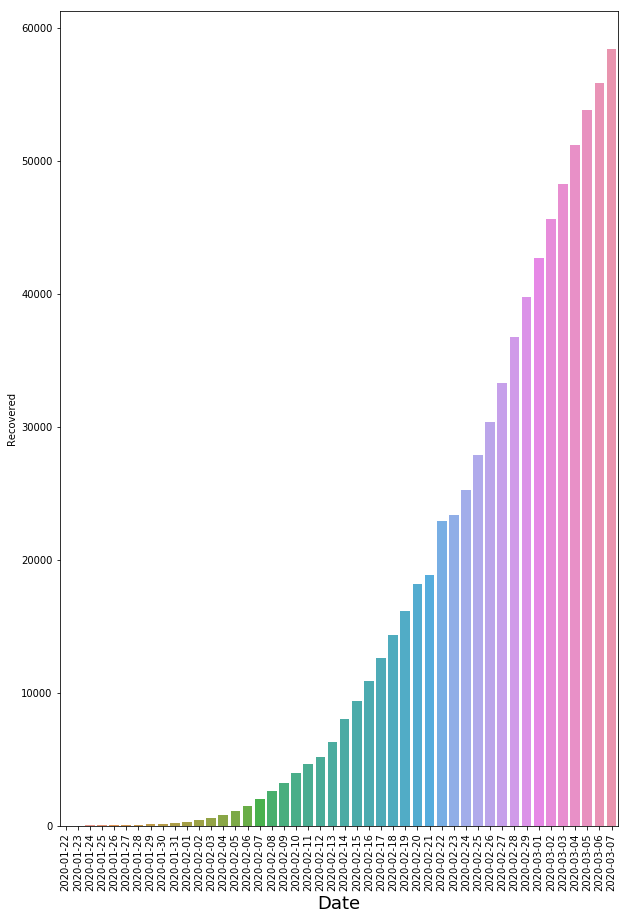

In [39]:
bar_plot('Recovered')

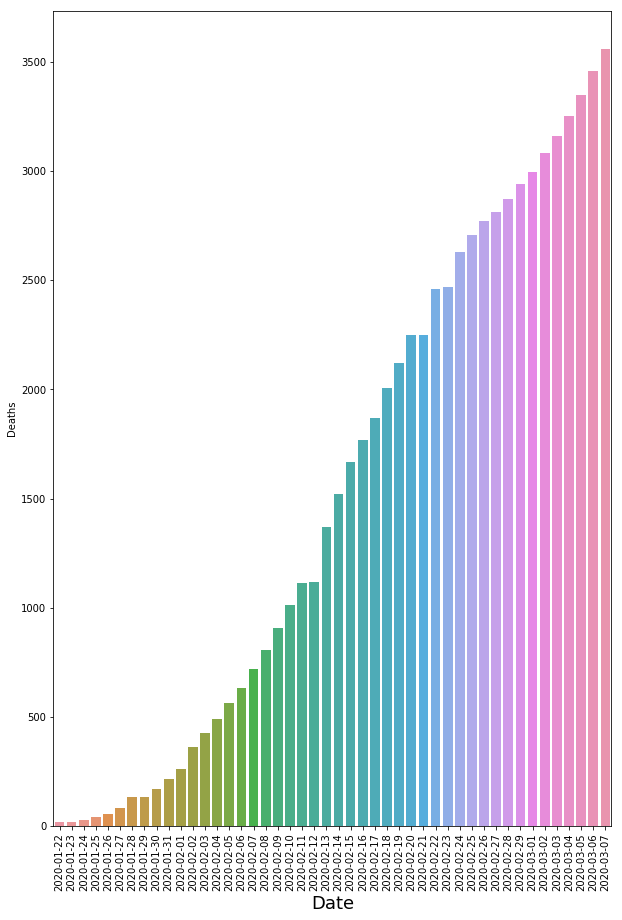

In [40]:
bar_plot('Deaths')

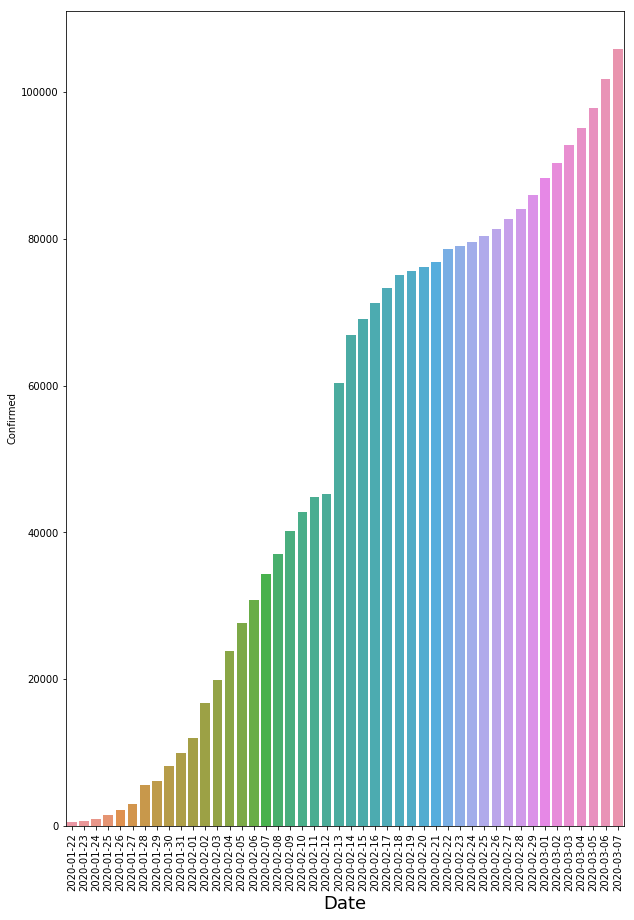

In [41]:
bar_plot('Confirmed')

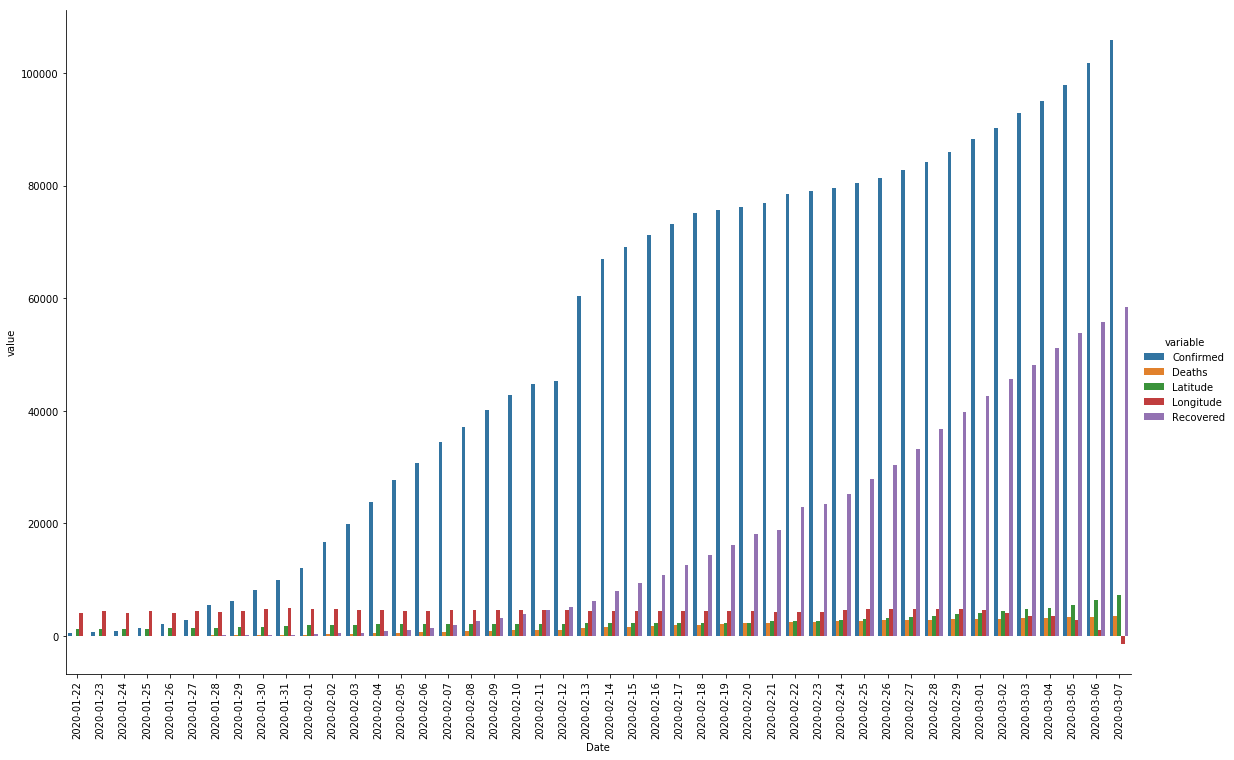

In [42]:
hm=sns.catplot(x='Date', y='value', hue='variable', data=melted_data, kind='bar',height=10,aspect =1.6,legend=True)
hm.set_xticklabels( rotation=90)

In [44]:
import plotly.express as px
fig = px.line(melted_data, x="Date",y='value', color='variable')
fig.show()

In [45]:
corona_data_country=pd.DataFrame(corona_data.groupby(by='Country').sum())
if 'Sno' in corona_data_country:
    corona_data_country=corona_data_country.drop('Sno',axis=1)
corona_data_country['country']=corona_data_country.index

In [46]:
corona_data_country.sort_values(['Confirmed','Deaths','Recovered'],ascending=[False,False,False])

,Confirmed,Deaths,Latitude,Longitude,Recovered,country
Country,,,,,,
Hubei,1810354.0,65524.0,1424.8776,5164.4522,519282.0,Hubei
Guangdong,45086.0,138.0,1073.7182,5217.5224,20506.0,Guangdong
Zhejiang,41586.0,17.0,1342.4272,5524.2964,20901.0,Zhejiang
Henan,41445.0,504.0,1558.5720,5226.2440,22257.0,Henan
Hunan,33968.0,94.0,1270.0784,5138.6048,18498.0,Hunan
...,...,...,...,...,...,...
"Plymouth County, MA",1.0,0.0,42.1615,-70.7928,0.0,"Plymouth County, MA"
"Queens County, NY",1.0,0.0,40.7282,-73.7949,0.0,"Queens County, NY"
"Santa Cruz County, CA",1.0,0.0,36.9741,-122.0308,0.0,"Santa Cruz County, CA"
